# Question 数据预处理 

## 1. 读取数据

使用的是20000条样例数据，每条记录代表一个question，这些question的标签中都包含python

In [1]:
import pandas as pd

In [2]:
# df_list = []
# for i in range(1, 5):
#     df = pd.read_csv('./dataset/toy_dataset/QueryResults{}.csv'.format(i))
#     df_list.append(df)
# question_df = pd.concat(df_list)
# question_df = question_df.iloc[:100, ]

In [3]:
question_df = pd.read_csv('./dataset/toy_dataset/example100.csv')

**question的基本信息：** 可以看见，一共有23个属性，其中有三个属性全为空(ParentId, DeletionDate, CommunityOwnedDate)，我们将这三个属性直接舍去，剩下的属性有：
1. Id：question的id
2. PostTypeId：该post的类型，取值为1代表这个post是一条question，因为收集的全是问题，因此全都是1
3. AcceptedAnswerId：该问题如果具有最佳答案，则会记录下最佳答案的id
4. CreationDate：问题创建的时间
5. Score：问题的打分
6. ViewCount：问题的浏览量
7. Body：问题的主体部分，用html格式给出
8. OwnerUserId：问题持有者的id
9. OwnerDisplayName：问题持有者的name
10. LastEditorUserId：最后编辑问题的用户的id
11. LastEditorDisplayName：最后编辑问题的用户的name
12. LastEditDate：问题最后被编辑的日期
13. LastActivityDate：问题最后活跃的时间
14. Title：问题的标题
15. Tags：问题的标签
16. AnswerCount：问题的回答数
17. CommentCount：问题的评论数量
18. FavoriteCount：收藏数
19. ClosedDate：问题关闭时间
20. ContentLicense：license

In [4]:
question_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     100 non-null    int64  
 1   PostTypeId             100 non-null    int64  
 2   AcceptedAnswerId       10 non-null     float64
 3   ParentId               0 non-null      float64
 4   CreationDate           100 non-null    object 
 5   DeletionDate           0 non-null      float64
 6   Score                  100 non-null    int64  
 7   ViewCount              100 non-null    int64  
 8   Body                   100 non-null    object 
 9   OwnerUserId            100 non-null    float64
 10  OwnerDisplayName       0 non-null      float64
 11  LastEditorUserId       28 non-null     float64
 12  LastEditorDisplayName  0 non-null      float64
 13  LastEditDate           28 non-null     object 
 14  LastActivityDate       100 non-null    object 
 15  Title  

In [5]:
question_df.tail(3)

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
97,64840429,1,NaN,NaN,2020-11-15 01:34:28,NaN,0,13,<p>So this may sound like a dumb question but ...,12349163.0,...,2020-11-15 03:30:26,2020-11-15 03:30:26,What actually happens when you index using who...,<python><sqlalchemy><whoosh>,0,0,NaN,NaN,NaN,CC BY-SA 4.0
98,64840419,1,NaN,NaN,2020-11-15 01:31:33,NaN,-3,10,<p>I doing mobile voice assistant and i need s...,14267016.0,...,NaN,2020-11-15 01:31:33,How to make server for mobile app using Python...,<python><django><mobile-application>,0,1,NaN,NaN,NaN,CC BY-SA 4.0
99,64840409,1,NaN,NaN,2020-11-15 01:29:12,NaN,-2,17,<p>The final grade is calculated by rounding t...,14597782.0,...,NaN,2020-11-15 01:35:37,how to round numbers in python based on 2 vari...,<python>,1,1,NaN,NaN,NaN,CC BY-SA 4.0


## 2. 数据处理

### 2.1 处理非文本数据
---

**LastEditDate 转换成是否被编辑过**

In [6]:
question_df['Editted'] = question_df['LastEditDate'].isnull().astype('int')

**AcceptedAnswerId 转换成是否具有最佳答案**

In [7]:
question_df['OwnAcceptedAnswer'] = question_df['AcceptedAnswerId'].isnull().astype('int')

**ClosedDate 转换成是否被关闭**

In [8]:
question_df['Closed'] = question_df['ClosedDate'].isnull().astype('int')

**FavoriteCount  要用0填补空缺值**

In [9]:
question_df['FavoriteCount'] = question_df['FavoriteCount'].fillna(0.0).astype('int')

**CreationDate, LastActivityDate转成时间戳**

In [10]:
import time
# 将字符串格式时间转换为时间戳
def str_to_timestep(s):
    timeArray = time.strptime(s.split('.')[0], "%Y-%m-%d %H:%M:%S")
    timeStamp = int(time.mktime(timeArray))
    return timeStamp

In [11]:
time_cols = ['CreationDate', 'LastActivityDate']
for col in time_cols:
    question_df[col] = question_df[col].apply(str_to_timestep)

In [12]:
question_df[time_cols]

,CreationDate,LastActivityDate
0,1605387954,1605387954
1,1605387867,1605387867
2,1605387659,1605387659
3,1605387464,1605387954
4,1605387360,1605387360
...,...,...
95,1605375461,1605379162
96,1605375437,1605379057
97,1605375268,1605382226
98,1605375093,1605375093


**删除无用列**<br>
（有的属性可能在后续的任务中是有用的，例如ClosedDate，这个后续可以进行调整）

In [13]:
useless_cols = ['DeletionDate', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'ContentLicense', 'LastEditorUserId', 'LastEditorDisplayName', 'LastEditDate', 'CommunityOwnedDate', 'ClosedDate', 'OwnerUserId', 'OwnerDisplayName']
question_df.drop(columns=useless_cols, inplace=True)

还剩下14个列（这里保留了id），然后我们可以发现，除了Body, Title, Tags这三个列的类别为object，表示它们是非数字属性，其余的都已经转为int类型

In [14]:
question_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 100 non-null    int64 
 1   CreationDate       100 non-null    int64 
 2   Score              100 non-null    int64 
 3   ViewCount          100 non-null    int64 
 4   Body               100 non-null    object
 5   LastActivityDate   100 non-null    int64 
 6   Title              100 non-null    object
 7   Tags               100 non-null    object
 8   AnswerCount        100 non-null    int64 
 9   CommentCount       100 non-null    int64 
 10  FavoriteCount      100 non-null    int64 
 11  Editted            100 non-null    int64 
 12  OwnAcceptedAnswer  100 non-null    int64 
 13  Closed             100 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 11.1+ KB


**将数字类型的列进行归一化**<br>
注意：Editted，Closed，OwnAcceptedAnswer这三个不需要进行归一化

In [15]:
text_cols = ['Body', 'Title', 'Tags']
label_cols = ['Editted', 'OwnAcceptedAnswer', 'Closed']
ignore_cols = text_cols + label_cols + ['Id']
need_scaler_columns = [col for col in question_df.columns if col not in ignore_cols]

In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
question_df[need_scaler_columns] = min_max_scaler.fit_transform(question_df[need_scaler_columns])

### 2.2 处理文本数据
---

#### <font color='blue'>(1) 处理Tags</font>
* 整理Tags的格式

In [17]:
# question_df["Tags"].head()

In [18]:
def handle_tag(tag):
    # 去除尖括号
    return tag.replace("<", " ").replace(">", " ").strip()
question_df["Tags"] = question_df["Tags"].apply(handle_tag)

* 统计一下一共有哪些tag

In [19]:
question_df['Tags'] = question_df['Tags'].apply(lambda x: x.split())
all_tags = [tag for tag_list in question_df['Tags'].values for tag in tag_list]

In [20]:
tmp_set = set(all_tags)
unique_tags = list(tmp_set)
len(unique_tags)

128

In [21]:
import nltk
keywords = nltk.FreqDist(all_tags)  # 统计

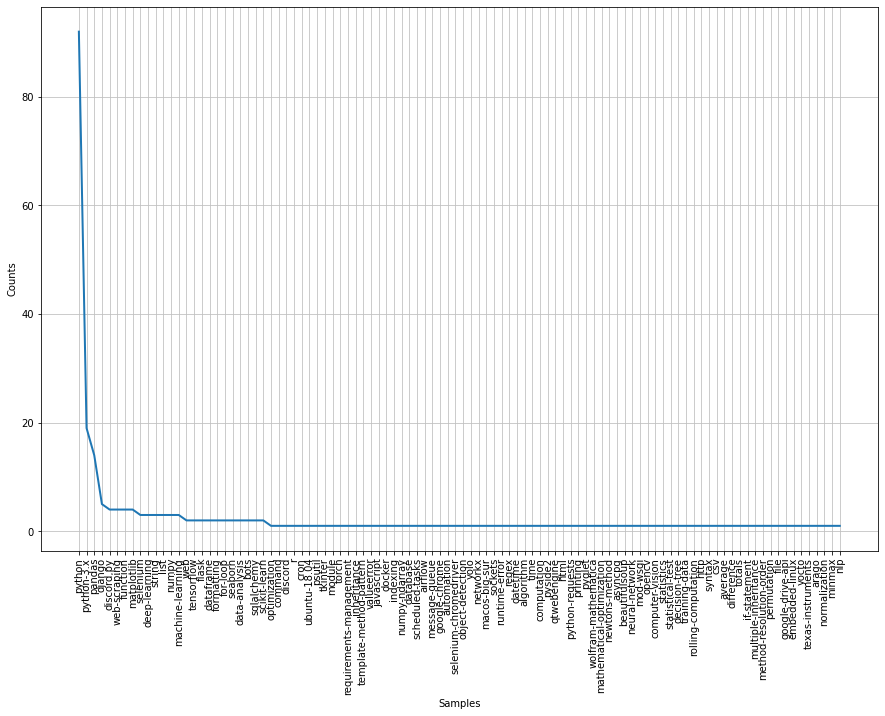

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
import matplotlib.pyplot as plt
frequencies_words = keywords.most_common(100)  # top 100 最常使用的tag
tags_features = [word[0] for word in frequencies_words]
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(100, cumulative=False)

#### <font color='blue'>(2) 处理Body</font>

* 将Body中的HTML标签去除:<br>
    - 先删除code标签以及里面的内容<br>
    - 然后使用beautiful soup工具来提取html标签中的文本

In [23]:
import re

code_pattern = re.compile(r"<code>.*?</code>", flags=re.DOTALL)
question_df["Body"] = question_df["Body"].apply(lambda x: code_pattern.sub(" ", x)) 

In [24]:
from bs4 import BeautifulSoup

question_df["Body"] = question_df["Body"].apply(lambda x: BeautifulSoup(x).get_text()) 

* 大小写转换、缩写替换、无意义字符替换

In [25]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
question_df["Body"] = question_df["Body"].apply(lambda x: clean_text(x)) 

* 处理标点符号

In [26]:
from nltk.tokenize import ToktokTokenizer

punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~-'

def strip_list_noempty(mylist):    # 将文本列表进行按空格拆分
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

token=ToktokTokenizer()
# tags_set = tmp_set
def clean_punct(text):        # 处理一段文本，处理文本中的标点符号
    words=token.tokenize(text)        # 分词
    punctuation_filtered = []         # 保存处理后的单词列表
    regex = re.compile('[%s]' % re.escape(punct))       # re.escape用于将标点符号转义，让它们仅表示标点符号本身
    for w in words:
        punctuation_filtered.append(regex.sub('', w))
        # if w in tags_set:    # 如果需要，可以保留tag中的标点
        #     punctuation_filtered.append(w)
        # else:
        #     punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))


question_df["Body"] = question_df["Body"].apply(lambda x: clean_punct(x))

* 词型还原、删除停顿词(这里仅先进行词性还原，以防删除停顿词影响句意)

In [27]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

lemma=WordNetLemmatizer()     # 词型还原
stop_words = set(stopwords.words("english"))  # 删除停顿词

def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    
    stop_words = set(stopwords.words("english"))
    
    words=token.tokenize(text)
    
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))


question_df["Body"] = question_df["Body"].apply(lambda x: lemitizeWords(x))

# question_df["Body"] = question_df["Body"].apply(lambda x: stopWordsRemove(x))


In [28]:
# 随机查看一条body，可以看到文本经过处理后的结果
import random
question_df["Body"].iloc[random.randint(0, question_df.shape[0]-1)]

'i be hit the cpu limit on my vps for my discord bot i be wonder if postgresql benefit to have multiple core do i need to be use multiple connections i be use and asyncpg'

#### <font color='blue'>(3) 处理Title</font>
* 与处理body的过程十分类似

In [29]:
question_df["Title"] = question_df["Title"].apply(lambda x: str(x))
question_df["Title"] = question_df["Title"].apply(lambda x: clean_text(x))
question_df["Title"] = question_df["Title"].apply(lambda x: clean_punct(x))
question_df["Title"] = question_df["Title"].apply(lambda x: lemitizeWords(x))
# question_df["Title"] = question_df["Title"].apply(lambda x: stopWordsRemove(x))

In [30]:
# 随机查看一条title，可以看到文本经过处理后的结果
import random
question_df["Title"].iloc[random.randint(0, question_df.shape[0]-1)]

'pointer workaround in python'

### 2.3 使用Bert模型提取Body、Title中具有的语义信息
---

 #### <font color='blue'>(1) 从HuggingFace中加载预训练模型 </font>

In [31]:
from transformers import AutoTokenizer, AutoModel
from transformers import DistilBertModel, DistilBertTokenizer

# 可以使用更好的模型，但是模型参数量太大，这里使用一个精炼版本的Bert：distilbert
# tokenizer = AutoTokenizer.from_pretrained("jeniya/BERTOverflow_stackoverflow_github")

# model = AutoModel.from_pretrained("jeniya/BERTOverflow_stackoverflow_github")

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

model = DistilBertModel.from_pretrained('distilbert-base-uncased')

#### <font color='blue'>(2)使用tokenizer处理文本，将body文本进行padding、mask </font>

In [32]:
body_tokenized =  question_df["Body"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=64)))
title_tokenized =  question_df["Title"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=32)))

In [33]:
body_max_len = 0
for i in body_tokenized.values:
    if len(i) > body_max_len:
        body_max_len = len(i)

title_max_len = 0
for i in title_tokenized.values:
    if len(i) > title_max_len:
        title_max_len = len(i)

In [34]:
import numpy as np
body_padded = np.array([i + [0]*(body_max_len-len(i)) for i in body_tokenized.values])
title_padded = np.array([i + [0]*(title_max_len-len(i)) for i in title_tokenized.values])

In [35]:
body_attention_mask = np.where(body_padded != 0, 1, 0)
title_attention_mask = np.where(title_padded != 0, 1, 0)

In [36]:
import torch
body_ids = torch.tensor(body_padded)
title_ids = torch.tensor(title_padded)
body_attention_mask = torch.tensor(body_attention_mask)
title_attention_mask = torch.tensor(title_attention_mask)

#### <font color='blue'>(3)使用Bert得到文本的嵌入表示 </font>

In [37]:
with torch.no_grad():
    body_embedding = model(body_ids, attention_mask = body_attention_mask)
    title_embedding = model(title_ids, attention_mask = title_attention_mask)

In [38]:
body_features = body_embedding[0][:,0,:].numpy() # 只取[CLS]的嵌入结果
title_features = title_embedding[0][:,0,:].numpy()

In [39]:
body_features.shape

(100, 768)

#### <font color='blue'>(4)对嵌入向量进行可视化 </font>

* 使用svd对嵌入向量进行降维

In [40]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
def reduce_to_k_dim(M, k=2):   
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
    # ------------------
    svd = TruncatedSVD(n_components=2)
    M_reduced = svd.fit_transform(M)

    # ------------------

    print("Done.")
    return M_reduced

In [41]:
body_features_reduced = reduce_to_k_dim(body_features)
title_features_reduced = reduce_to_k_dim(title_features)

Running Truncated SVD over 100 words...
Done.
Running Truncated SVD over 100 words...
Done.


* 使用降维的向量进行可视化

In [42]:
def plot_embeddings(M_reduced, doc_idx_list, tags):
    # ------------------
    plt.figure(figsize=(20,20))
    for i, doc_idx in enumerate(doc_idx_list):
        tag = tags[doc_idx]
        if not tag:
            continue
        x_coord = M_reduced[doc_idx][0]
        y_coord = M_reduced[doc_idx][1]
        plt.scatter(x_coord, y_coord, marker = 'x', color = 'red')
        plt.text(x_coord+0.0003, y_coord+0.0003, tag, fontsize=9)
    plt.show()
    # ------------------

In [43]:
doc_idx_list = list(range(50))
tags = [question_df['Tags'][idx] for idx in doc_idx_list]

In [44]:
for i in range(len(tags)):
    tags[i] = [t for t in tags[i] if 'python' not in t]    # 因为每个question都带有python标签，可视化的时候删掉python标签
    tags[i] = "".join(tags[i])

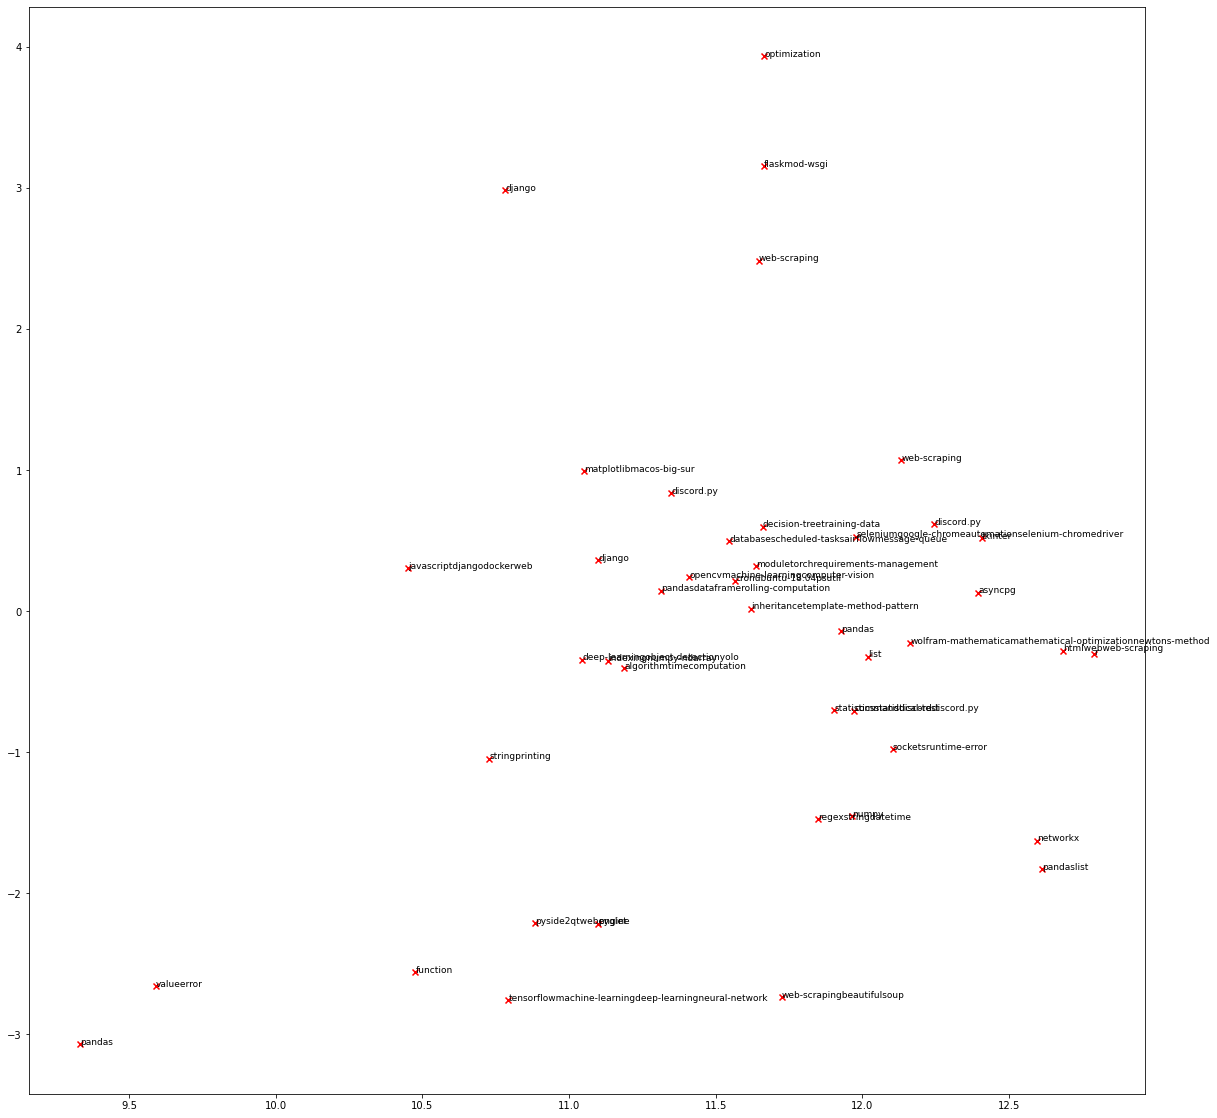

In [45]:
plot_embeddings(title_features_reduced, doc_idx_list, tags)    # 绘制

从上图可以看到，嵌入向量确实可以一定程度上现实其语义信息，例如图中的中间靠右侧的两个问题，标签里都含有chrome，这两个问题的嵌入向量，经过PCA降维后，距离很近

---

### **最后处理得到的结果有：**
+ 处理过的question_df
+ Body文本内容的嵌入 body_features
+ Title文本内容的嵌入 title_features

In [48]:
question_df.head(2)

,Id,CreationDate,Score,ViewCount,Body,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,Editted,OwnAcceptedAnswer,Closed
0,64841366,1.000000,0.714286,0.000000,hey i have be cod in python for a while and i ...,1.000000,be there any better way to write this,"[python, python-3.x, optimization]",0.0,0.0,0.0,1,1,1
1,64841360,0.993309,0.714286,0.047619,currently each column that i want to delimit s...,0.993235,how do i delimit each column by a comma and re...,"[python, pandas]",0.0,0.0,0.0,1,1,1


In [49]:
body_features.shape

(100, 768)

In [50]:
title_features.shape

(100, 768)